# 数据分组

```{admonition} 在线刷题
:class: seealso

检查 or 强化 `Pandas` 数据分析操作？<a href="https://www.heywhale.com/mw/project/6146c0318447b8001769ff20" target="_blank">👉在线体验「Pandas进阶修炼300题」</a>
```

```{note} 
本页面代码可以[在线编辑、执行](../指引/在线执行.md)！
```

数据分组是 `pandas` 数据分析的核心功能，可以将一个 `DataFrame` 根据一定的规则拆分为多个组合，并应用不同的函数进行计算，`pd.groupby`接收多个参数（`DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)`），但整体思想如下图简单的过程所示，即**分组 + 计算** 输出不同地区员工的平均薪资


```{figure} https://pic.liuzaoqi.com/picgo/202112231751376.png
:width: 100%
:align: center
```

当然上面的过程还有其他的实现方法，例如写成 `df.groupby("地区", as_index=False)['薪资'].mean()`，如果你想进一步了解，下面是更多数据分组的案例，你可以修改相关代码来验证自己的想法！

## 本页数据说明

为了更好的介绍相关操作，本页面使用 **某招聘网站数据.csv** 数据进行展开，你应该对数据**字段、数值、类型**等相关信息做一个大致了解！

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth',8)
df = pd.read_csv("某招聘网站数据.csv",parse_dates=['createTime'])
df.head()

positionName companySize industryField financeStage companyLabelList  \
0     数据分析      50-150人     移动互联...            A轮      ['绩效...           
1     数据建模      150-...          电商            B轮      ['年终...           
2     数据分析      2000人以上     移动互联...          上市公司      ['节日...           
3     数据分析      500-...          电商         D轮及以上      ['生日...           
4     数据分析      2000人以上       物流丨运输          上市公司      ['技能...           

  firstType secondType thirdType createTime district  salary workYear  \
0  产品|需...      数据分析       数据分析  2020-...        余杭区   37500     1-3年   
1  开发|测...      数据开发         建模  2020-...        滨江区   15000     3-5年   
2  产品|需...      数据分析       数据分析  2020-...        江干区    3500     1-3年   
3  开发|测...      数据开发       数据分析  2020-...        江干区   45000     3-5年   
4  产品|需...      数据分析       数据分析  2020-...        余杭区   30000     3-5年   

  jobNature education positionAdvantage  imState  score  matchScore  \
0       全职        本科   五险一金...             today    233  15.1...      
1       全职        本科   六险一金...           disa...    176  32.5...      
2       全职        本科   五险一金...             today     80  14.9...      
3       全职        本科      年终奖等           thre...     68  12.8...      
4       全职        大专      五险一金           disa...     66  12.7...      

   famousCompany  
0    False        
1    False        
2    False        
3     True        
4     True

## 分组统计

### 均值

计算各区(`district`)的薪资(`salary`)均值

In [233]:
df[['district','salary']].groupby(by='district').mean()

# df.groupby("district")['salary'].mean()

salary
district              
上城区       26250.000000
下沙        30000.000000
余杭区       33583.333333
拱墅区       28500.000000
江干区       25250.000000
滨江区       31428.571429
萧山区       36250.000000
西湖区       30893.939394

### 取消索引

重新按照上一题要求进行分组，但不使用 `district` 做为索引

In [242]:
df.groupby("district", as_index=False)['salary'].mean()

district        salary
0      上城区  26250.000000
1       下沙  30000.000000
2      余杭区  33583.333333
3      拱墅区  28500.000000
4      江干区  25250.000000
5      滨江区  31428.571429
6      萧山区  36250.000000
7      西湖区  30893.939394

### 排序

计算并提取平均薪资最高的区

In [197]:
df[['district','salary']].groupby(by='district').mean().sort_values('salary',ascending=False).head(1)

salary
district         
萧山区       36250.0

### 频率

计算不同行政区(`district`)，不同规模公司(`companySize`)出现的次数

In [201]:
pd.DataFrame(df.groupby("district")['companySize'].value_counts())

# df.groupby(['district','companySize']).size()

companySize
district companySize             
上城区      50-150人                2
下沙       150-500人               1
余杭区      2000人以上               14
         150-500人              13
         50-150人                7
         500-2000人              2
拱墅区      500-2000人              2
         2000人以上                1
         50-150人                1
江干区      2000人以上                2
         500-2000人              2
滨江区      150-500人              14
         2000人以上                6
         500-2000人              1
萧山区      500-2000人              3
         50-150人                1
西湖区      2000人以上               11
         500-2000人              9
         150-500人               7
         50-150人                5
         15-50人                 1

### 修改索引名

将上一题的索引名修改为
- district -> 行政区
- companySize -> 公司规模

In [384]:
pd.DataFrame(df.groupby("district")['companySize'].value_counts()).rename_axis(["行政区", "公司规模"])

companySize
行政区 公司规模                  
上城区 50-150人              2
下沙  150-500人             1
余杭区 2000人以上             14
    150-500人            13
    50-150人              7
    500-2000人            2
拱墅区 500-2000人            2
    2000人以上              1
    50-150人              1
江干区 2000人以上              2
    500-2000人            2
滨江区 150-500人            14
    2000人以上              6
    500-2000人            1
萧山区 500-2000人            3
    50-150人              1
西湖区 2000人以上             11
    500-2000人            9
    150-500人             7
    50-150人              5
    15-50人               1

### 计数

在上一个操作的基础上，统计每个区出现的公司数量

In [231]:
df.groupby("district")['companySize'].count()

district
上城区     2
下沙      1
余杭区    36
拱墅区     4
江干区     4
滨江区    21
萧山区     4
西湖区    33
Name: companySize, dtype: int64

## 分组查看

### 查看各组信息

将数据按照 `district`、`salary` 进行分组，并查看各分组内容

In [210]:
df.groupby(["district",'salary']).groups

{('上城区', 22500): [81], ('上城区', 30000): [97], ('下沙', 30000): [31], ('余杭区', 7500): [84], ('余杭区', 20000): [52, 103], ('余杭区', 22500): [23, 51], ('余杭区', 25000): [62], ('余杭区', 27500): [24, 49], ('余杭区', 29000): [93], ('余杭区', 30000): [4, 10, 13, 18, 59, 61, 65, 68, 74, 76, 86, 92, 94], ('余杭区', 35000): [101], ('余杭区', 37500): [0, 32, 38, 39, 41], ('余杭区', 40000): [60, 87], ('余杭区', 45000): [25], ('余杭区', 50000): [5, 64, 90], ('余杭区', 60000): [8, 82], ('拱墅区', 24000): [72], ('拱墅区', 30000): [54, 89, 96], ('江干区', 3500): [2], ('江干区', 22500): [45], ('江干区', 30000): [73], ('江干区', 45000): [3], ('滨江区', 7500): [83], ('滨江区', 15000): [1], ('滨江区', 20000): [21, 40], ('滨江区', 22500): [37], ('滨江区', 30000): [22, 53, 55, 58, 67, 80, 102], ('滨江区', 32500): [26], ('滨江区', 37500): [17, 28, 57, 77], ('滨江区', 42500): [91], ('滨江区', 45000): [43, 47], ('滨江区', 50000): [44], ('萧山区', 25000): [100], ('萧山区', 30000): [6], ('萧山区', 45000): [66, 69], ('西湖区', 6500): [71], ('西湖区', 20000): [12], ('西湖区', 21500): [104], ('西湖区', 22500): [48, 70

### 查看指定条件信息

将数据按照 `district`、`salary` 进行分组，并查看西湖区薪资为 30000 的工作

In [237]:
df.groupby(["district",'salary']).get_group(("西湖区",30000))

positionName companySize industryField financeStage  \
11  大数据分析工程师(J11108)     2000人以上    移动互联网,企业服务         上市公司   
27            数据分析经理     2000人以上            硬件        不需要融资   
33         数据分析师（社招）   500-2000人         移动互联网         上市公司   
34           商业数据分析师     50-150人    移动互联网,企业服务           B轮   
85           高级数据分析师   500-2000人         移动互联网         上市公司   
88           资深数据分析师   500-2000人         移动互联网           A轮   
98         数据分析建模工程师     50-150人     数据服务,信息安全           A轮   

                        companyLabelList  firstType secondType thirdType  \
11      ['技能培训', '年底双薪', '带薪年假', '岗位晋升']  开发|测试|运维类       数据开发      数据分析   
27      ['年终分红', '带薪年假', '年度旅游', '岗位晋升']  产品|需求|项目类       数据分析      数据分析   
33      ['绩效奖金', '股票期权', '年底双薪', '专项奖金']  产品|需求|项目类       数据分析      数据分析   
34         ['定期体检', '帅哥多', '领导好', '美女多']     市场|商务类      市场|营销    商业数据分析   
85  ['包午餐晚餐', '奖金多多多', '零食下午茶', '全员出国游']  产品|需求|项目类       数据分析      数据分析   
88      ['岗位晋升', '年度旅游', '年底双薪', '午餐补助']  产品|需求|项目类       数据分析      数据分析   
98   ['午餐补助', '带薪年假', '16到18薪', '法定节假日']  开发|测试|运维类       人工智能      机器学习   

            createTime district  salary workYear jobNature education  \
11 2020-03-16 09:25:00      西湖区   30000    应届毕业生        全职        本科   
27 2020-03-16 11:24:00      西湖区   30000    5-10年        全职        本科   
33 2020-03-16 11:18:00      西湖区   30000    应届毕业生        全职        不限   
34 2020-03-16 11:13:00      西湖区   30000     1-3年        全职        硕士   
85 2020-03-14 21:28:00      西湖区   30000     3-5年        全职        本科   
88 2020-03-15 19:43:00      西湖区   30000     3-5年        全职        大专   
98 2020-03-14 19:00:00      西湖区   30000     1-3年        全职        本科   

      positionAdvantage    imState  score  matchScore  famousCompany  
11  六险一金 带薪年假 年度体检 周末双休      today     17    4.245066          False  
27     股票期权,千万级用户,试用期全薪      today      6    1.164083           True  
33     16-18薪 大数据A股上市公司      today     15    1.020377           True  
34          发挥空间大,职业发展好      today      5    1.095633          False  
85      福利好，年轻有活力，行业前景好      today      2    0.389503          False  
88    六险一金,餐饮补贴,双休,出国旅游      today      1    0.502371          False  
98  海量数据 全链路建模实践 16-18薪  threeDays      0    0.356308          False

## 分组规则

### 过匿名函数1

根据 createTime 列，计算每天不同 行政区 新增的岗位数量

In [258]:
pd.DataFrame(df.groupby([df.createTime.apply(lambda x:x.day)])[
             'district'].value_counts()).rename_axis(["发布日", "行政区"])

district
发布日 行政区          
9   余杭区         1
10  拱墅区         1
11  萧山区         1
    西湖区         1
12  上城区         1
13  西湖区         1
14  西湖区         3
    余杭区         1
    拱墅区         1
    滨江区         1
15  余杭区         6
    滨江区         2
    西湖区         1
16  余杭区        28
    西湖区        27
    滨江区        18
    江干区         4
    萧山区         3
    拱墅区         2
    上城区         1
    下沙          1

### 通过匿名函数2

计算各行政区的企业领域（industryField）包含电商的总数



In [257]:
df.groupby("district", sort=False)["industryField"].apply(
lambda x: x.str.contains("电商").sum())

district
余杭区    9
滨江区    9
江干区    2
萧山区    3
西湖区    4
下沙     1
拱墅区    0
上城区    0
Name: industryField, dtype: int64

### 通过内置函数

通过 positionName 的长度进行分组，并计算不同长度岗位名称的薪资均值

In [272]:
df.set_index("positionName").groupby(len)['salary'].mean()

4     30125.000000
5     34083.333333
6     32954.545455
7     29816.666667
8     31875.000000
9     29375.000000
10    30000.000000
11    34166.666667
12    29583.333333
13    38833.333333
14    40000.000000
15    26000.000000
16    28750.000000
17    40000.000000
18    25750.000000
19    45000.000000
21    21500.000000
23    60000.000000
Name: salary, dtype: float64

### 通过字典

将 score 和 matchScore 的和记为总分，与 salary 列同时进行分组，并查看结果

In [260]:
df.groupby({'salary':'薪资','score':'总分','matchScore':'总分'}, axis=1).sum()

总分     薪资
0    248.101875  37500
1    208.559414  15000
2     94.972357   3500
3     80.874153  45000
4     78.755375  30000
..          ...    ...
100    0.314259  25000
101    0.283276  35000
102    0.256719  30000
103    0.281062  20000
104    0.159343  21500

[105 rows x 2 columns]

### 通过多列

计算不同 工作年限（`workYear`）和 学历（`education`）之间的薪资均值

In [259]:
pd.DataFrame(df['salary'].groupby([df['workYear'], df['education']]).mean())

salary
workYear education              
1-3年     不限         36250.000000
         本科         31000.000000
         硕士         36875.000000
3-5年     不限         30312.500000
         大专         28125.000000
         本科         31828.125000
5-10年    不限         26250.000000
         本科         28423.076923
不限       不限         35000.000000
         本科         35625.000000
应届毕业生    不限         32500.000000
         本科         33833.333333

## 分组转换（transform）

在原数据框 df 新增一列，数值为该区的平均薪资水平

In [359]:
df['该区平均工资'] = df[['district','salary']].groupby(by='district').transform('mean')

## 分组过滤（filter）


提取平均工资小于 30000 的行政区的全部数据

In [ ]:
df.groupby('district').filter(lambda x: x['salary'].mean() < 30000)

微信搜索公众号「早起Python」，关注后可以获得更多资源！

## 分组可视化

对杭州市各区公司数量进行分组，并使用柱状图进行可视化

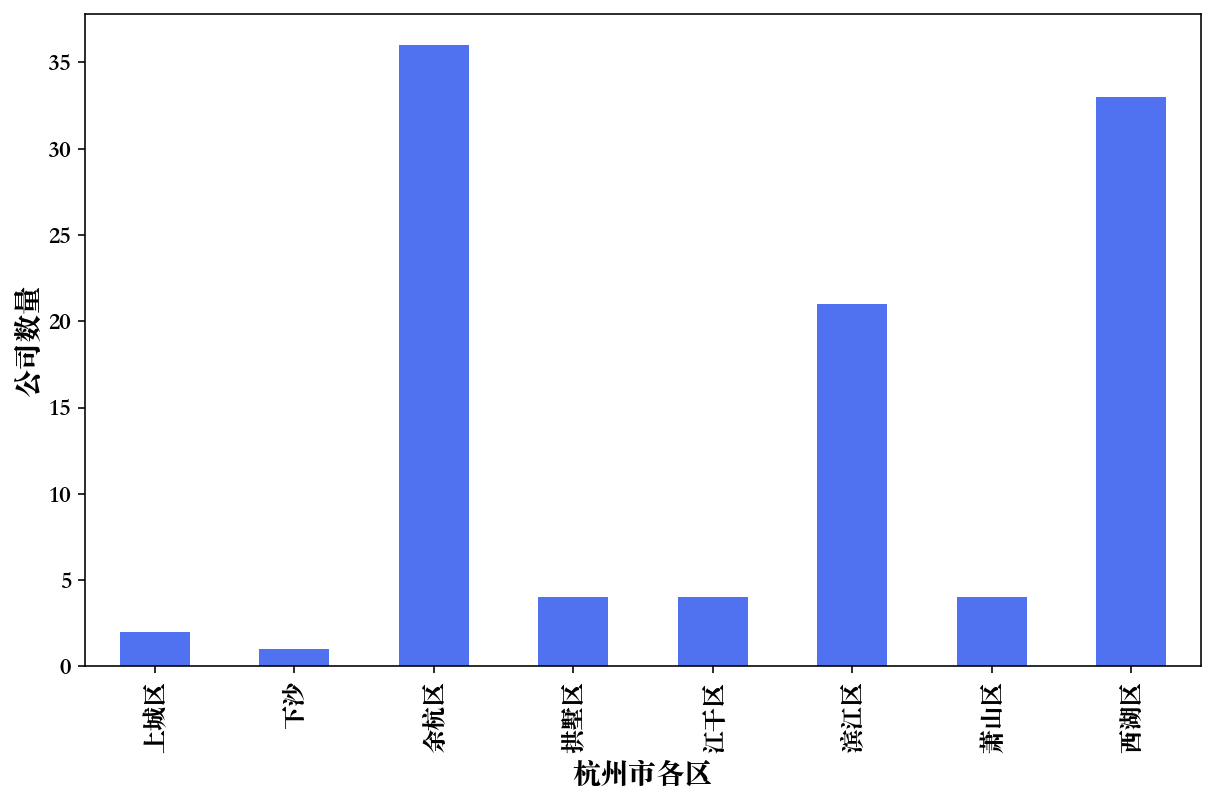

In [297]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['Songti SC']

df.groupby("district")['positionName'].count().plot(
    kind='bar', figsize=(4, 2), color='#5172F0', fontsize=6)

plt.ylabel("公司数量",fontsize = 8)
plt.xlabel("杭州市各区",fontsize = 8)

plt.show()